In [13]:
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier



In [2]:
def crossCheck(cross,foldnum):
    scores=[]
    for i in range(len(cross)):

        ctrain=[]
        ctrain_y=[]
        testnum=foldnum-i-1
        testme=[]
        testme_y=[]
        
        testme=np.array(testme)
        testme_y=np.array(testme_y)
        j=0
        while j<len(cross):

            
            if j!=testnum:
                for thing in cross[j]:
                    ctrain.append(thing[0])
                    ctrain_y.append(thing[1])
               
            j+=1

# meds=[]
# with open('meds.txt') as medt:
#     meds=medt.readline().strip().split('\t')
data=pd.read_csv('diabetic_data.csv')
diag=data[['diag_1','diag_2','diag_3']]
#for thing in diag:
data=data.drop(['admission_type_id','discharge_disposition_id','admission_source_id','max_glu_serum','number_inpatient','number_emergency','number_outpatient','encounter_id','patient_nbr','weight','payer_code','A1Cresult','medical_specialty','max_glu_serum','diag_1','diag_2','diag_3'],axis=1)
data=data.drop(data[data.race=='?'].index)

data=data.drop(data[data.gender=='Unknown/Invalid'].index)
#data=data.drop(data[data.diag_3==str].index)


read=data['readmitted']
read=read.str.upper()
read=read.replace(['NO','<30','>30'],[0,1,1])

#print(read)
data=data.replace(['None','Female','No','Down'],0)
data=data.replace(['Male','Yes','Up','Steady'],1)
#data=data.replace(['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)'],[0,1,2,3,4,5,6,7,8,9])
data=data.replace(['Down'],2)
#data=data.replace(['Other','Hispanic'],[3,4])
r=pd.get_dummies(data[['race','diabetesMed']])
change=pd.get_dummies(data['change'])
a=pd.get_dummies(data['age'])
#meddum=pd.get_dummies(data[meds])

newdata=pd.concat([data,r,a,change],axis=1)
newdata=newdata.drop(['age','race','readmitted','change','diabetesMed'],axis=1)
#newdata=newdata.drop(meds,axis=1)

X=data.drop(['readmitted'],axis=1)

read=np.array(read)
#for thing in read:
#    print(thing)
x, X_test, y, y_test = train_test_split(newdata, read, test_size = 0.15, random_state = 0)
X_train,x_dev,y_train,y_dev=train_test_split(x,y,test_size=.18, random_state=0)

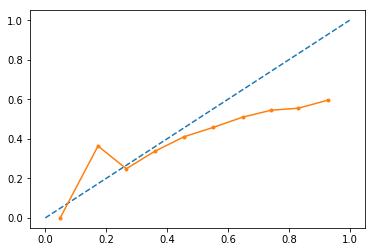

In [3]:
# LinearSVC reliability diagram with calibration

# fit a model
model = LinearSVC()
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
calibrated.fit(X_train, y_train)
# predict probabilities
probs = calibrated.predict_proba(x_dev)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(y_dev, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

In [9]:

#Predict and find accuracy
pred=(calibrated.predict(x_dev))
print(f1_score(pred,y_dev))
print(accuracy_score(pred,y_dev))


0.07121507472384665
0.5305130394797346


In [ ]:

# SVC BaggingClassifier diagram with calibration
n_estimators = 10
# fit a model
model = OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True), max_samples=1.0 / n_estimators, n_estimators=n_estimators))
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
calibrated.fit(X_train, y_train)
# predict probabilities
probs = calibrated.predict_proba(x_dev)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(y_dev, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()


In [ ]:
#Predict and find accuracy
pred=(calibrated.predict(x_dev))
print(f1_score(pred,y_dev))
print(accuracy_score(pred,y_dev))
